In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
train_data = pd.read_csv("round1_ijcai_18_train_20180301.txt", sep=" ")
test_data = pd.read_csv("round1_ijcai_18_test_a_20180301.txt", sep=" ")

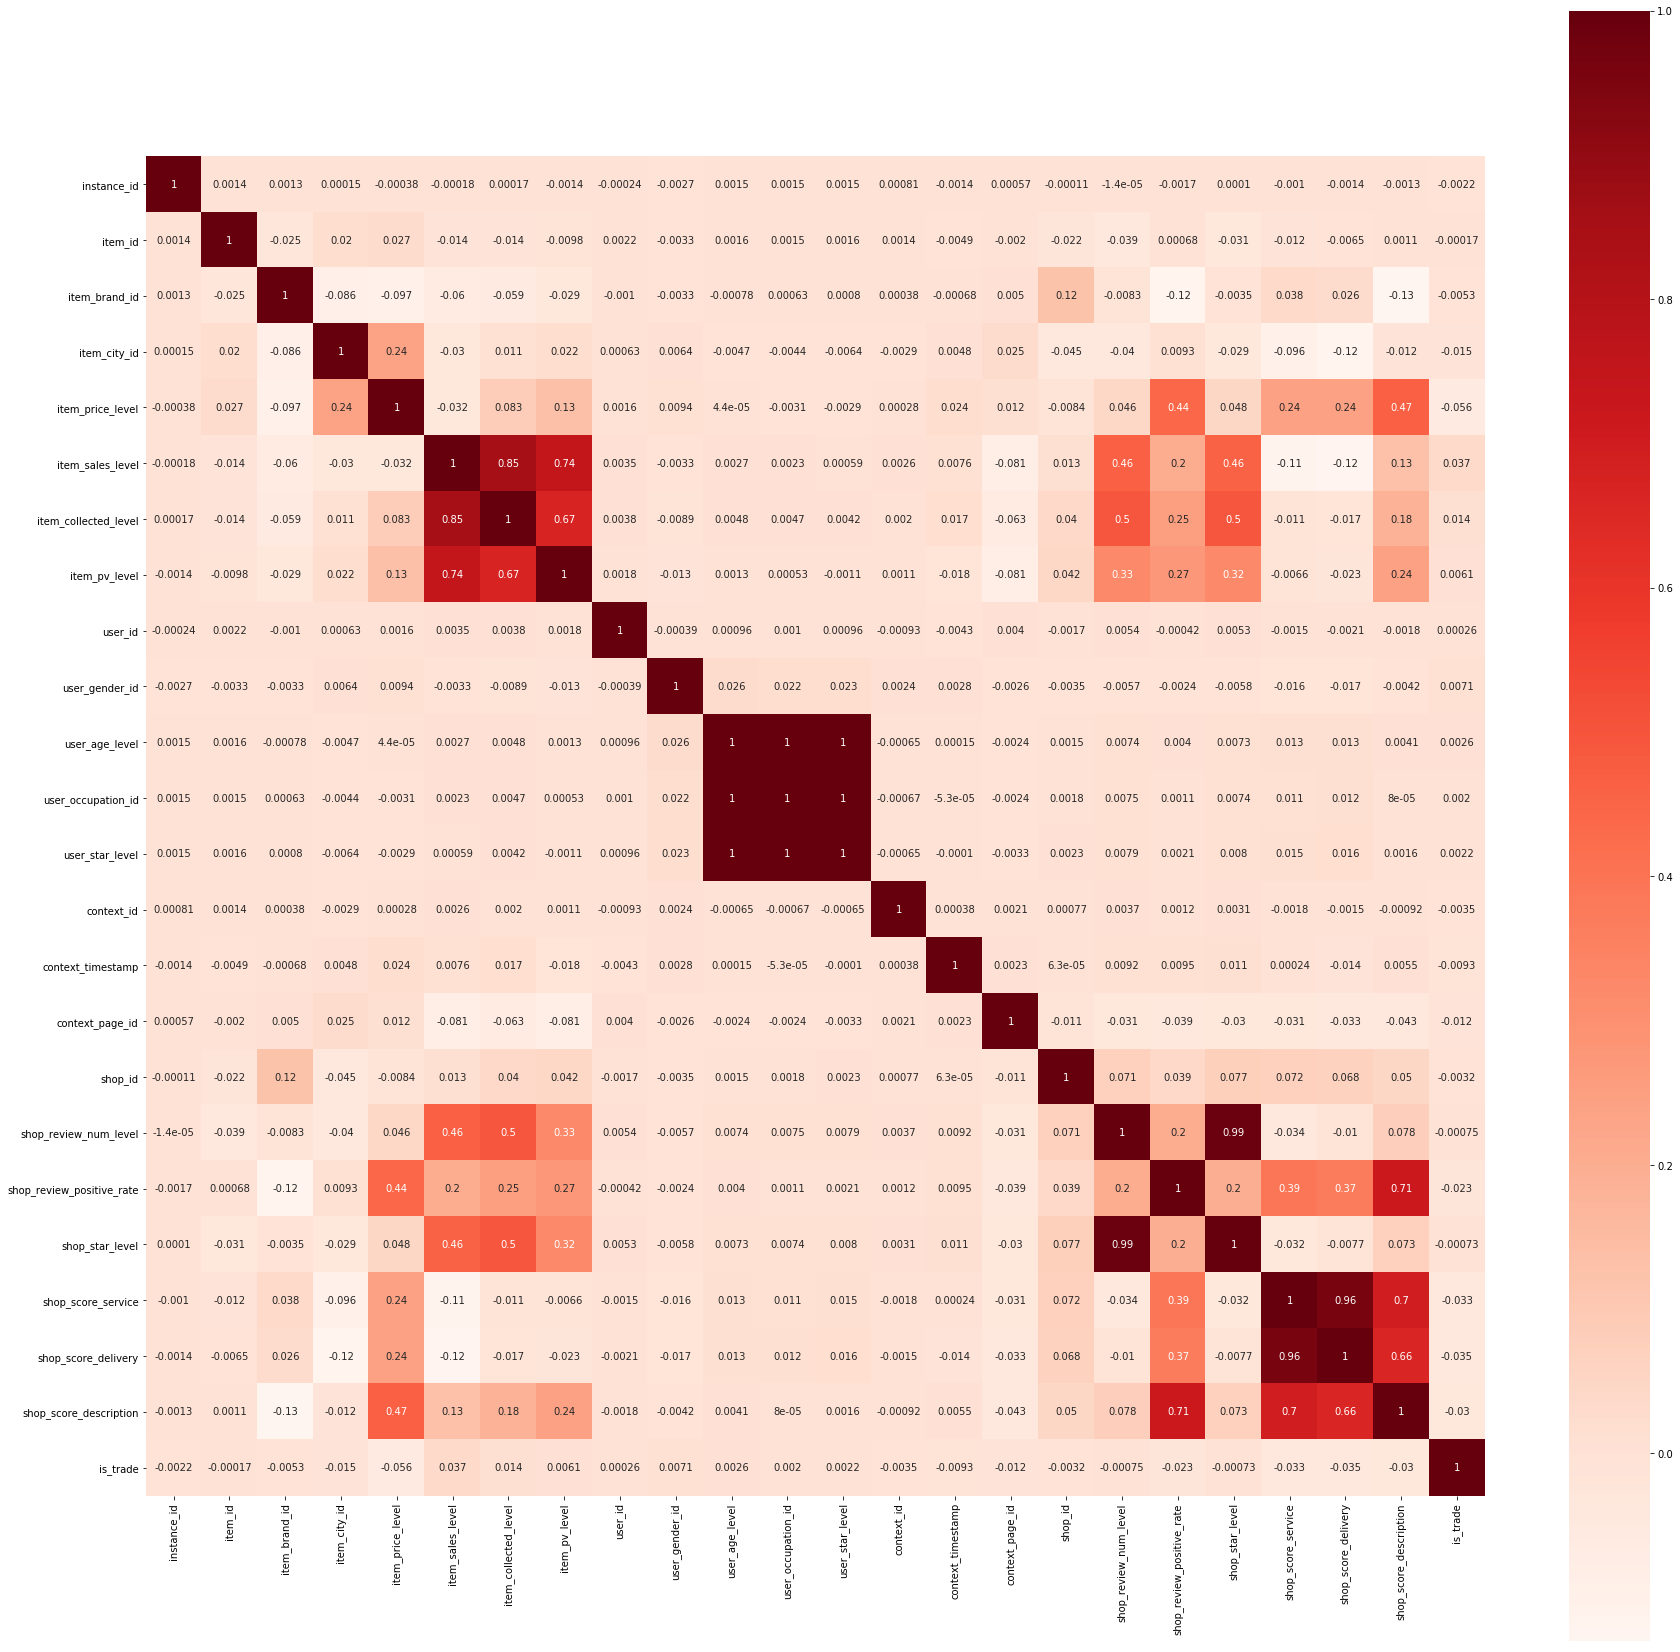

In [50]:
#def plot_heatmap():
dfdata = train_data.corr()   
plt.subplots(figsize=(30,30))
#vmax,vmin:分别是热力图的颜色取值最大和最小范围
#annot(annotate的缩写):默认取值False；如果是True，在热力图每个方格写入数据
sns.heatmap(dfdata, annot=True, vmax=1, square=True, cmap='Reds')
plt.savefig("./bluestaterelation1.png")
plt.show()

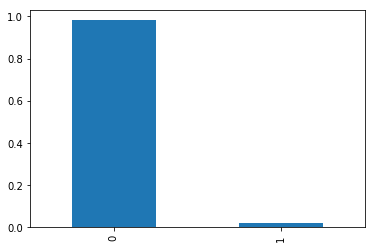

In [78]:
train_data.is_trade.value_counts(normalize=True).plot.bar()#pie() 
plt.show()

In [184]:
train_data.shape
train_data.columns.tolist()
# def choose_features():
#----------特征重要程度-----------
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.feature_selection import SelectFromModel
# features = ['context_id',
#  'context_page_id',
#  'instance_id',
#  'item_brand_id',
#  'item_city_id',
#  'item_collected_level',
#  'item_id',
#  'item_price_level',
#  'item_pv_level',
#  'shop_id',
#  'shop_review_positive_rate',
#  'shop_score_delivery',
#  'shop_score_description',
#  'shop_star_level',
#  'user_age_level',
#  'user_gender_id',
#  'user_id',]
# train_data = pd.read_csv("round1_ijcai_18_train_20180301.txt", sep=" ")
# clf = ExtraTreesClassifier()
# y = train_data.is_trade
# x = train_data.loc[:,features]
# clf = clf.fit(x,y)
# clf.feature_importances_
#model = SelectFromModel(clf,threshold='1.25*mean',prefit=True)选择特征重要性为1.25倍均值的特征
#x_trees = model.transform(x) 返回所选的特征

array([ 0.15883504,  0.0691535 ,  0.16031378,  0.01794603,  0.01368773,
        0.02292   ,  0.02547609,  0.01281394,  0.0252181 ,  0.01854687,
        0.03634248,  0.07528092,  0.07396265,  0.01639887,  0.08579308,
        0.03196751,  0.15534342])

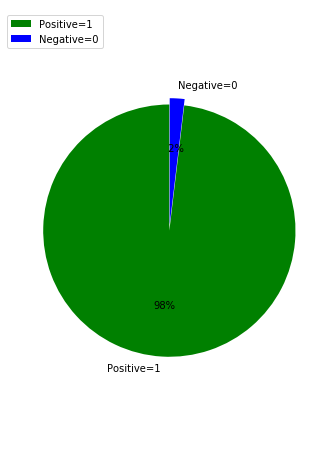

In [69]:
plt.figure(figsize=(5,8))
labels = [u'Positive=1',u'Negative=0']
sizes = [469117 / 478138, 9021/ 478138]
colors = ['green', 'blue']
explode = (0.05, 0)#伸出来的那部分比例
patches, l_text, p_text = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                                       labeldistance=1.1, autopct='%2.0f%%', shadow=False,
                                       startangle=90, pctdistance=0.6)
# labeldistance，文本的位置离圆心有多远，1.1指1.1倍半径的位置
# autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
# shadow，饼是否有阴影
# startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
# pctdistance，百分比的text离圆心的距离
# patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本
for t in l_text:
    t.set_size = 30
for t in p_text:
    t.set_size = 30
plt.axis('equal')#画圆
plt.legend(loc='upper left',bbox_to_anchor=(-0.1, 1))
plt.grid()
plt.show()

In [214]:
def seconds_convert_to_format(seconds):
    format = "%Y-%m-%d %H:%M:%S"
    import time
    value = time.localtime(seconds)
    newtime = time.strftime(format,value)
    return newtime

def timestamp_convert(all_data):
    all_data['newtime'] = all_data.context_timestamp.apply(seconds_convert_to_format)
    all_data['day'] = all_data.newtime.apply(lambda x: int(x[8:10]))
    all_data['hour'] = all_data.newtime.apply(lambda x:int(x[11:13]))
    all_data.drop(['context_timestamp'],axis=1,inplace=True)
    return all_data
all_data_process = timestamp_convert(all_data)
all_data_process.head()

,context_id,context_page_id,instance_id,is_trade,item_brand_id,item_category_list,item_city_id,item_id,item_price_level,item_property_list,...,shop_review_positive_rate,shop_score_delivery,shop_score_description,shop_star_level,user_age_level,user_gender_id,user_id,newtime,day,hour
0,282924576738839389,4006,108641074714126964,0.0,1975590437749032870,7908382889764677758;5799347067982556520,3948283326616421003,3412720377098676069,3,2072967855524022579;5131280576272319091;263639...,...,1.0,1.0,1.0,5002,1003,1,4505772604969228686,2018-09-18 10:09:04,18,10
1,4007979028023783431,4001,5754713551599725161,0.0,1975590437749032870,7908382889764677758;5799347067982556520,3948283326616421003,3412720377098676069,3,2072967855524022579;5131280576272319091;263639...,...,1.0,1.0,1.0,5002,1002,0,2692638157208937547,2018-09-18 12:00:32,18,12
2,4884875192608989870,4001,842679481291040981,0.0,1975590437749032870,7908382889764677758;5799347067982556520,3948283326616421003,3412720377098676069,3,2072967855524022579;5131280576272319091;263639...,...,1.0,1.0,1.0,5002,1003,0,5247924392014515924,2018-09-18 03:04:12,18,3
3,840119421106178602,4016,937088850059189027,0.0,1975590437749032870,7908382889764677758;5799347067982556520,3948283326616421003,3412720377098676069,3,2072967855524022579;5131280576272319091;263639...,...,1.0,1.0,1.0,5002,1004,1,2681414445369714628,2018-09-18 06:17:50,18,6
4,1736769971710354684,4001,7975697065017708072,0.0,1975590437749032870,7908382889764677758;5799347067982556520,3948283326616421003,3412720377098676069,3,2072967855524022579;5131280576272319091;263639...,...,1.0,1.0,1.0,5002,1002,0,2729475788342039013,2018-09-18 19:48:40,18,19


In [123]:
all_data_process.context_page_id.value_counts()

4001    277676
4002     45458
4003     32659
4004     24990
4005     19577
4006     15725
4007     12846
4008     10780
4009      9325
4010      7754
4011      6630
4012      6033
4013      5078
4014      4405
4015      3961
4016      3498
4017      3110
4018      2624
4019      2331
4020      2022
Name: context_page_id, dtype: int64

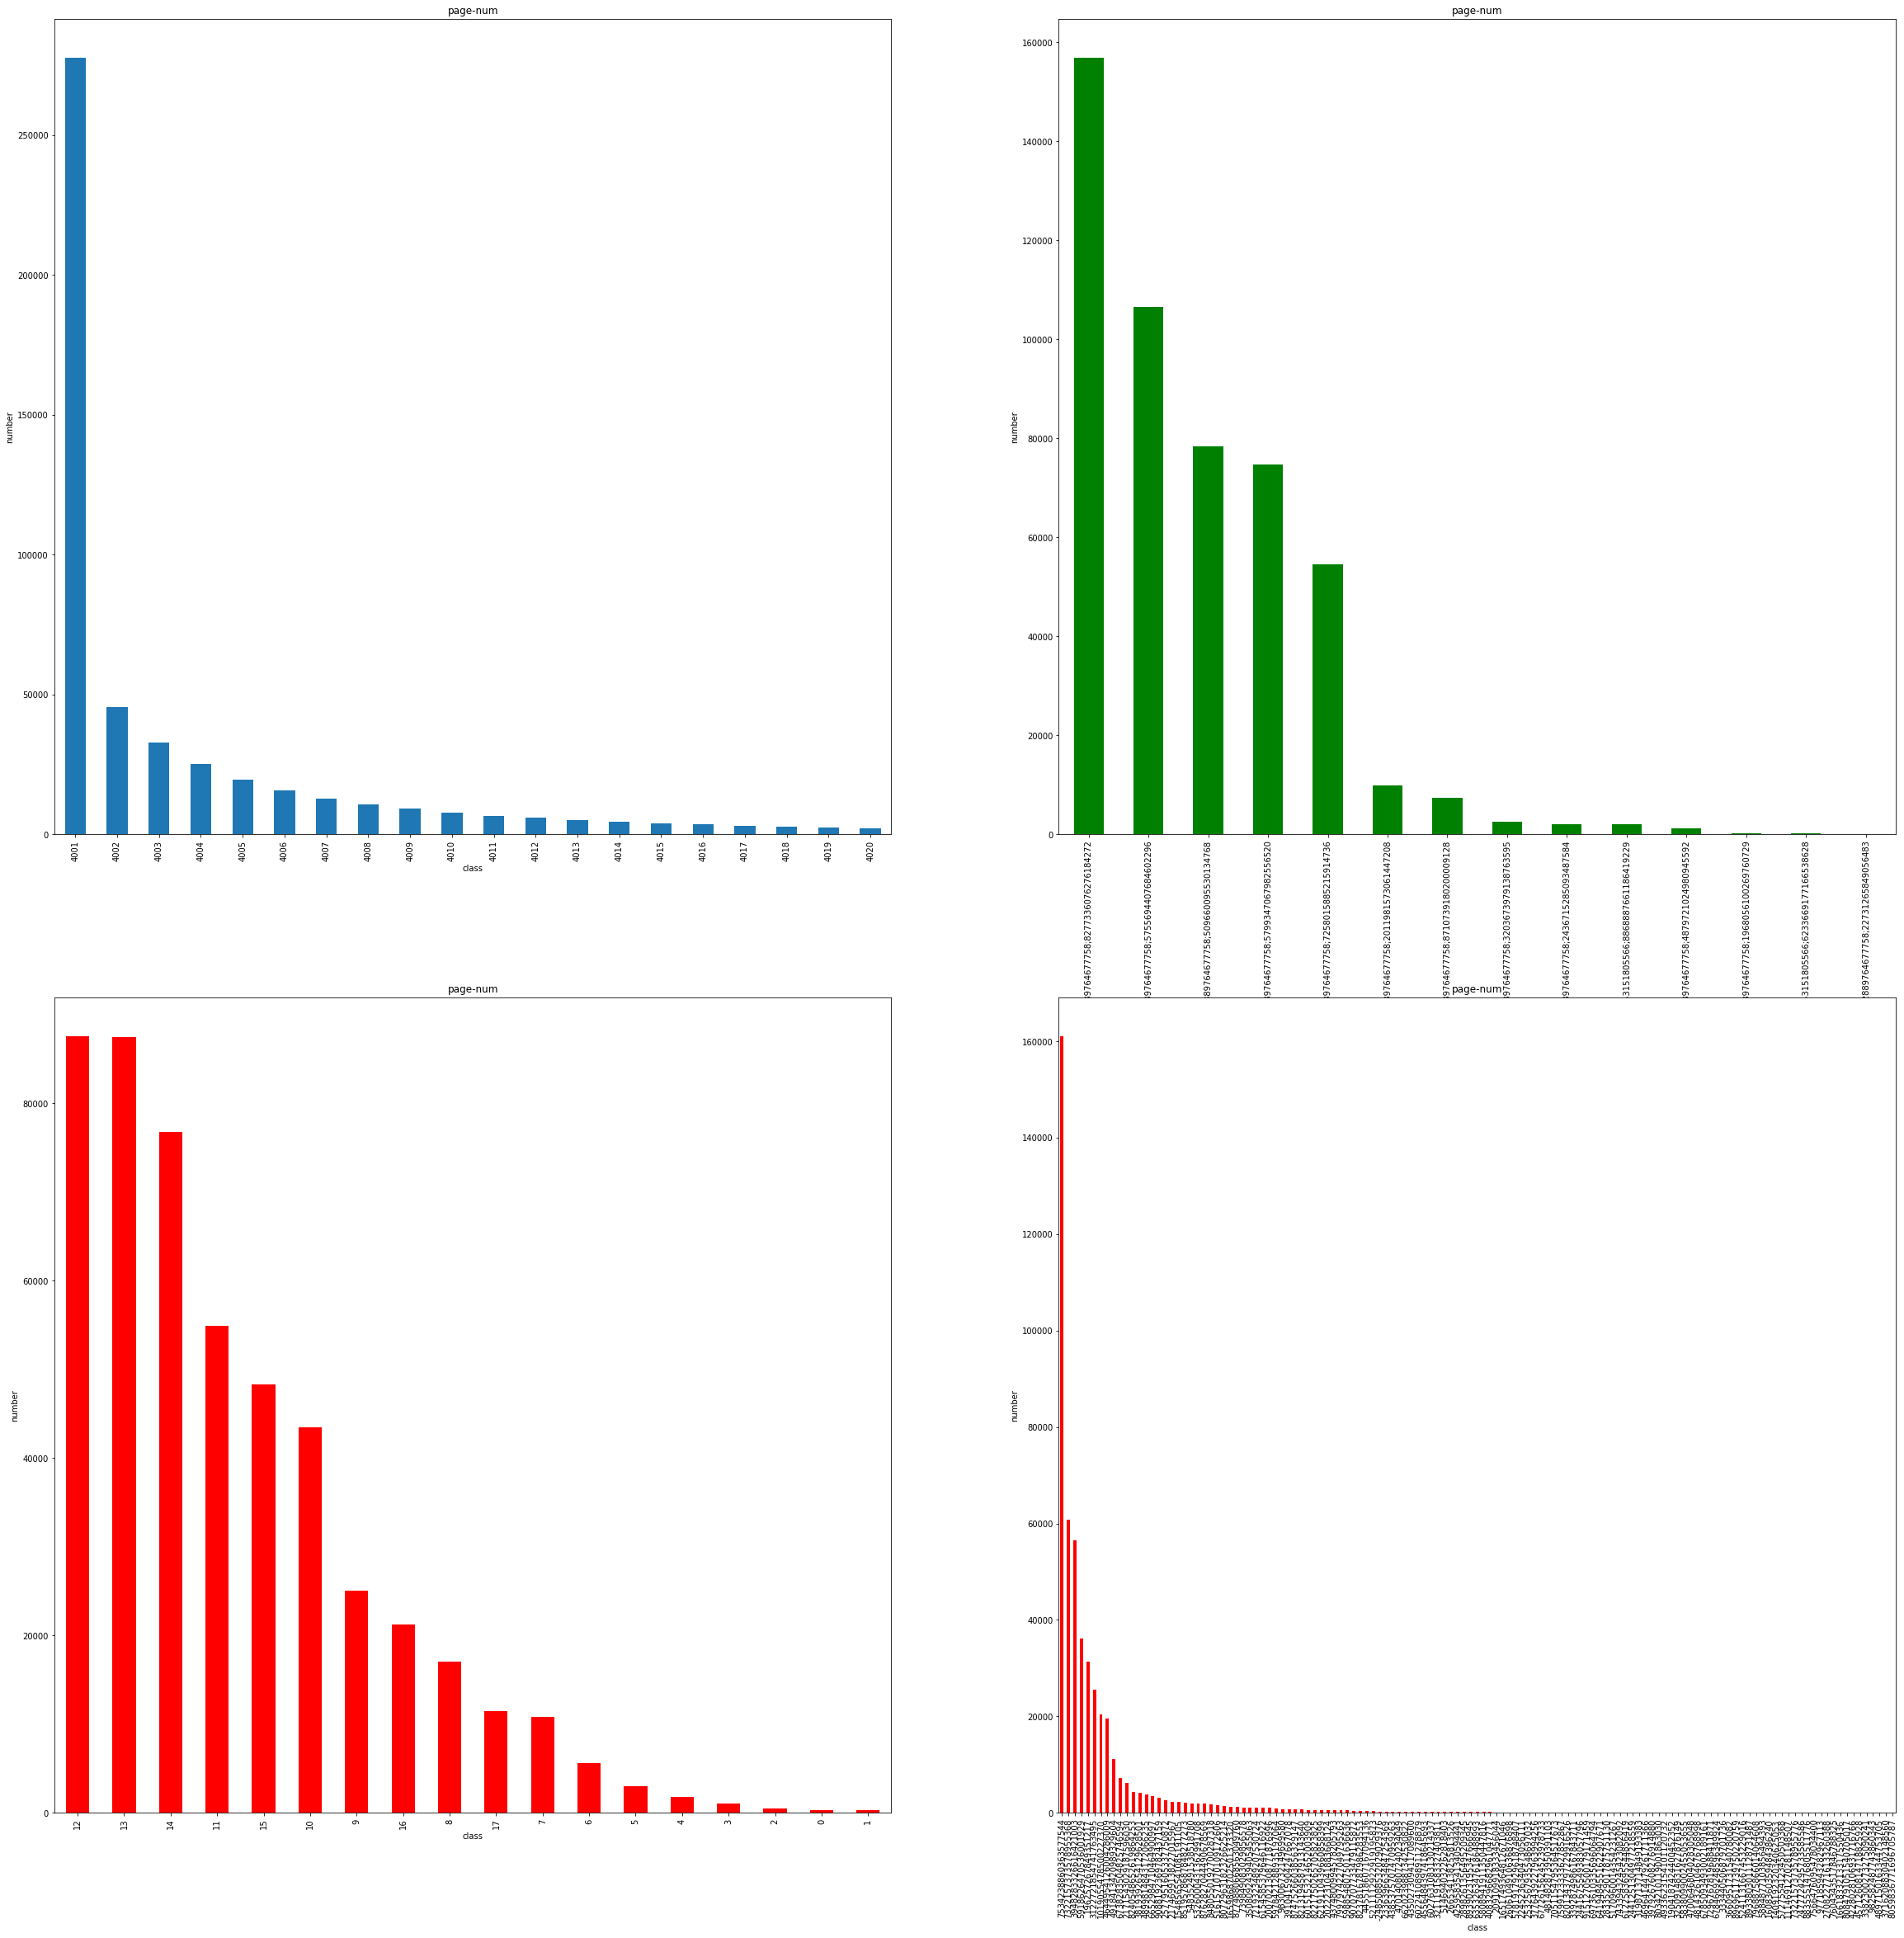

In [155]:
fig = plt.figure(figsize=(40,40))
fig.set(alpha=0.2)

plt.subplot2grid((2,2),(0,0))
all_data_process.context_page_id.value_counts().plot(kind='bar')
#print(all_data_process.context_page_id.value_counts())
plt.title('page-num')
plt.xlabel('class')
plt.ylabel('number')

plt.subplot2grid((2,2),(0,1))
all_data_process.item_category_list.value_counts().plot(kind='bar',color='green')
#print(all_data_process.item_category_list.value_counts())
plt.title('page-num')
plt.xlabel('class')
plt.ylabel('number')

plt.subplot2grid((2,2),(1,0))
all_data_process.item_collected_level.value_counts().plot(kind='bar',color='red')
#print(all_data_process.item_collected_level.value_counts())
plt.title('page-num')
plt.xlabel('class')
plt.ylabel('number')

plt.subplot2grid((2,2),(1,1))
all_data_process.item_city_id.value_counts().plot(kind='bar',color='red')
plt.savefig("./context_page_id+item_category_list+item_collected_level+item_city_id.png")
#print(all_data_process.item_city_id.value_counts())
plt.title('page-num')
plt.xlabel('class')
plt.ylabel('number')
plt.show()

In [170]:
all_data_process.context_page_id = all_data_process.context_page_id.values - 4000

In [199]:
#广告商品的城市数量统计
all_data_process.item_city_id.value_counts().shape

(129,)

In [201]:
#商品品牌数量统计
all_data_process.item_brand_id.value_counts().shape

(2076,)

In [202]:
#价格等级
all_data_process.item_price_level.value_counts().shape

(14,)

In [207]:
#商品收藏等级统计
print(all_data_process.item_collected_level.value_counts().shape)
all_data_process.item_collected_level.value_counts()

(18,)


12    87592
13    87478
14    76752
11    54899
15    48352
10    43489
9     25015
16    21211
8     17030
17    11418
7     10802
6      5595
5      2951
4      1812
3       997
2       524
0       287
1       278
Name: item_collected_level, dtype: int64

In [209]:
#商品被展示等级统计
print(all_data_process.item_pv_level.value_counts().shape)
all_data_process.item_pv_level.value_counts()

(22,)


18    105842
17     87440
19     84408
16     64971
20     44351
15     43186
14     26563
13     14398
21      9651
12      7613
11      4075
10      1925
9        961
8        468
7        261
0        128
6        120
5         65
4         36
3         13
2          5
1          2
Name: item_pv_level, dtype: int64

In [227]:
# 价格* 销量 -----------新特征
all_data_process['price_sales'] = all_data_process.item_price_level * all_data_process.item_sales_level
#print(all_data_process['price_sales'].value_counts().shape)
#all_data_process.drop(['item_price_level','item_sales_level'],axis=1,inplace=True)

AttributeError: 'DataFrame' object has no attribute 'item_price_level'

In [228]:
all_data_process.user_age_level.value_counts()

 1003    175939
 1004    131139
 1002     72838
 1005     58767
 1006     31254
 1000     13501
 1001      6666
 1007      5423
-1          982
Name: user_age_level, dtype: int64

In [230]:
all_data_process.user_gender_id.value_counts()

0    387964
1     97794
2     10751
Name: user_gender_id, dtype: int64

In [231]:
all_data_process.user_star_level.value_counts()

AttributeError: 'DataFrame' object has no attribute 'user_star_level'